# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [7]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [11]:
len(df["YEAR"].unique())

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [56]:
state_math8_avg = df.groupby("STATE").mean()["AVG_MATH_8_SCORE"]
print("OHIO AVG MATH8 SCORE: " + str(state_math8_avg["OHIO"]))
print("MICHIGAN AVG MATH8 SCORE: " + str(state_math8_avg["MICHIGAN"]))

OHIO AVG MATH8 SCORE: 282.25
MICHIGAN AVG MATH8 SCORE: 276.1666666666667


Find the average for your outcome score across all states in 2019

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [65]:
df.groupby("STATE").max()["AVG_MATH_8_SCORE"].head()

STATE
ALABAMA       269.0
ALASKA        283.0
ARIZONA       283.0
ARKANSAS      279.0
CALIFORNIA    277.0
Name: AVG_MATH_8_SCORE, dtype: float64

In [70]:
# find feature correlations
df.corr()["AVG_MATH_8_SCORE"]

# looks as if other test scores are representative of a higher math 8 score

YEAR                            0.552717
ENROLL_ALL_EST                 -0.047459
TOTAL_REVENUE                   0.095045
FEDERAL_REVENUE                 0.023831
STATE_REVENUE                   0.052929
LOCAL_REVENUE                   0.145453
TOTAL_EXPENDITURE               0.091851
INSTRUCTION_EXPENDITURE         0.097090
SUPPORT_SERVICES_EXPENDITURE    0.099414
OTHER_EXPENDITURE              -0.010455
CAPITAL_OUTLAY_EXPENDITURE      0.027447
ENROLL_PREK                     0.100716
ENROLL_KINDER                  -0.054616
ENROLL_4                       -0.050787
ENROLL_8                       -0.032233
ENROLL_12                       0.020345
ENROLL_PRIMARY                 -0.052410
ENROLL_HS                      -0.028654
ENROLL_ALL                     -0.036018
AVG_MATH_4_SCORE                0.910409
AVG_MATH_8_SCORE                1.000000
AVG_READING_4_SCORE             0.825038
AVG_READING_8_SCORE             0.892087
AVG_ALL_TESTS                   0.961881
Name: AVG_MATH_8

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [69]:
# since test scores are predicative, can merge all test scores into average of the three
df["AVG_ALL_TESTS"] = (df["AVG_MATH_4_SCORE"] + df["AVG_READING_4_SCORE"] + df["AVG_READING_8_SCORE"] + df["AVG_MATH_8_SCORE"]) / 4
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_ALL_TESTS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,255.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,253.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,243.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,254.5


Feature engineering justification: **<I added a column for avg of all test scores since the tests seemed to have a higher correlation(positive) with a math 8 test score\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='AVG_MATH_8_SCORE', ylabel='AVG_ALL_TESTS'>

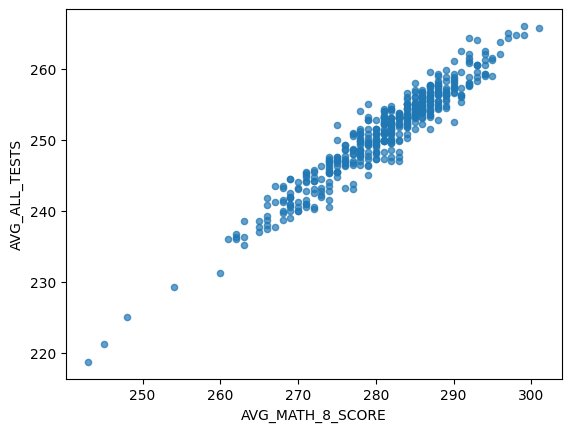

In [71]:
df.plot.scatter(x="AVG_MATH_8_SCORE", y = "AVG_ALL_TESTS", alpha=0.7)

**Relationship between average score of all tests and average score of MATH 8 score**

**Visualization 2**

<AxesSubplot:xlabel='AVG_MATH_8_SCORE', ylabel='AVG_MATH_4_SCORE'>

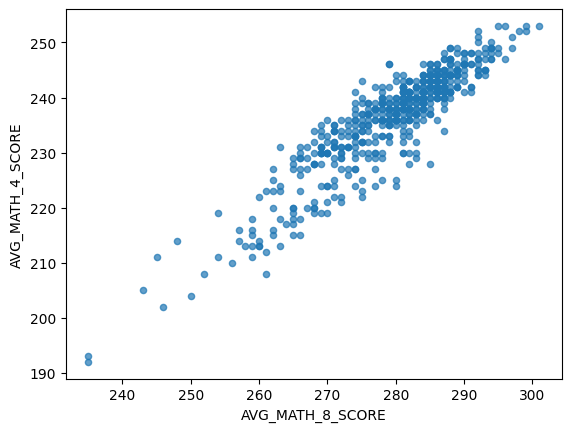

In [72]:
df.plot.scatter(x="AVG_MATH_8_SCORE", y="AVG_MATH_4_SCORE", alpha=0.7)

**Relationship between average score between 8th and 4th grade math**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df[["AVG_MATH_4_SCORE", "AVG_ALL_TESTS", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"] 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [76]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [77]:
# create your model here
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [81]:
# mean error
np.mean(model.predict(X_test)-y_test)

3.552713678800501e-14

In [80]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

4.500103993147301e-14

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

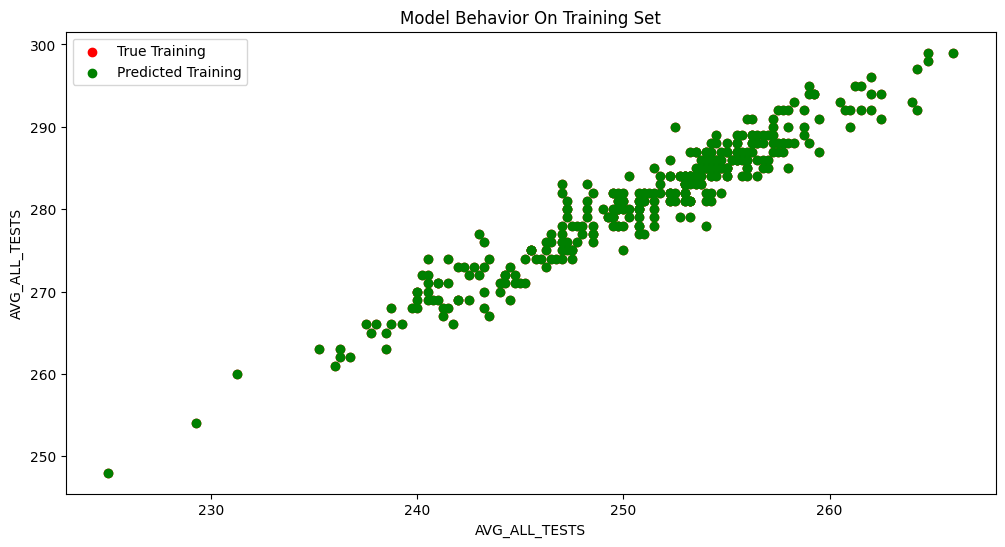

In [83]:
col_name = 'AVG_ALL_TESTS'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_ALL_TESTS')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

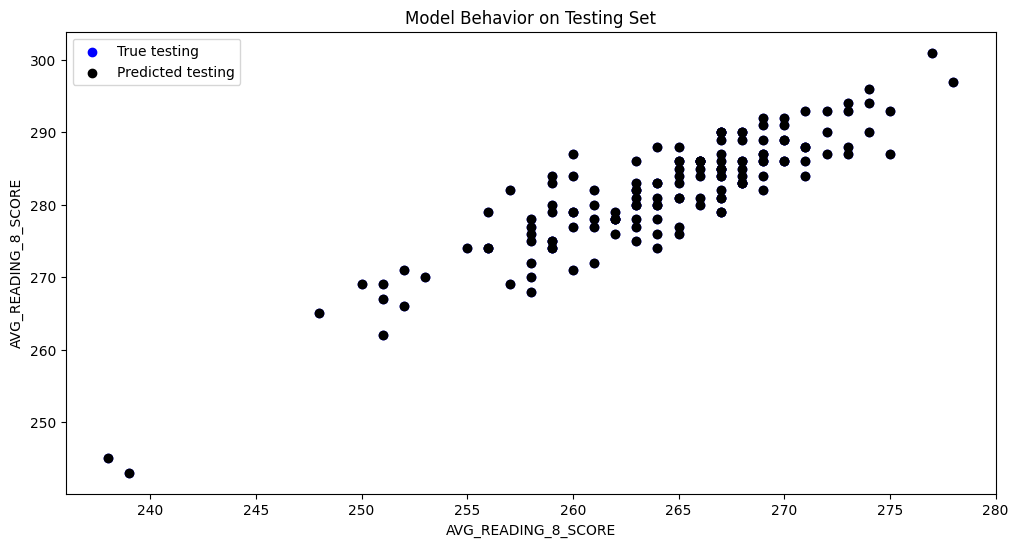

In [84]:
col_name = "AVG_READING_8_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**I cleaned up the data, analyzed it, and then taught a linear regression model to predict the outcome of the average test scores for 8th graders given 4 predictors. The synthesized predictor is the average value of all test scores which I chose because the correlation between features was highest with all of the test scores so I decided to merge them. The model ended up performing extremely well on the training and test set.**